In [123]:
import pandas as pd
heart = pd.read_csv('data\heart.csv')

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Lario\AppData\Local\Temp\ipykernel_13068\2624402941.py:2: SyntaxWarning: invalid escape sequence '\h'
  heart = pd.read_csv('data\heart.csv')


In [124]:
display(heart.head(5))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [126]:
display(heart['fbs'].value_counts())

fbs
0    258
1     45
Name: count, dtype: int64

Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

In [127]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

np.int64(79)

Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [128]:
# Напишем функцию для определения давления от пола и возраста
def pressure(age,sex):
    if age <= 20:
        if sex == 1:
            pressure = 123
        else: pressure = 116
    elif 21 <= age <= 30:
        if sex == 1:
            pressure = 126
        else: pressure = 120
    elif 31 <= age <= 40:
        if sex == 1:
            pressure = 129
        else: pressure = 127
    elif 41 <= age <= 50:
        if sex == 1:
            pressure = 135
        else: pressure = 137
    elif 51 <= age <= 60:
        if sex == 1:
            pressure = 142
        else: pressure = 144
    else:
        if sex == 1:
            pressure = 142
        else: pressure = 159
    return pressure



In [129]:
# Применим функцию к таблице
heart['trestbps_mean'] = heart.apply(lambda row: pressure(row['age'], row['sex']), axis=1)

In [130]:
display(heart['trestbps_mean'].iloc[300])

np.int64(142)

Задание 8.5

Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [131]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['cp','restecg','slope','ca','thal'])
# применяем трансформацию к столбцу
type_bin = encoder.fit_transform(heart[['cp','restecg','slope','ca','thal']])
#добавляем результат к исходному DataFrame
heart = pd.concat([heart, type_bin], axis=1)
heart = heart.drop(columns=['cp','restecg','slope','ca','thal'], axis=1)

In [132]:

display(heart)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


Задание 8.6

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

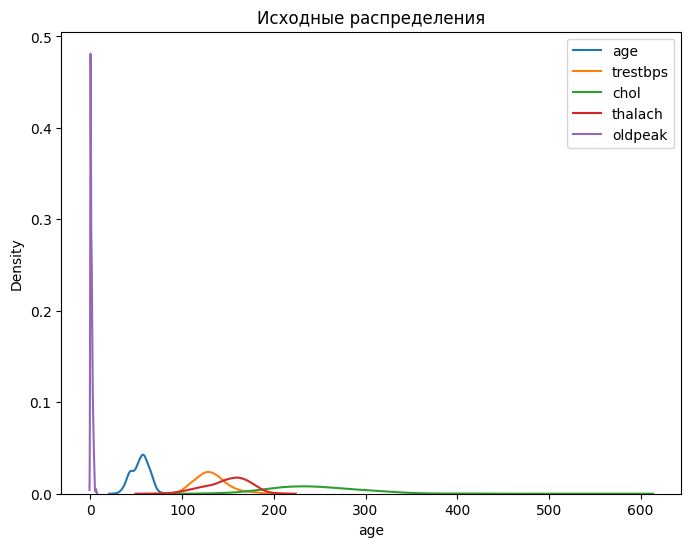

In [134]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart['age'], ax=ax1, label ='age')
sns.kdeplot(heart['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend();

Нормализуем методом  MinMaxScaler

In [135]:
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
heart_mm = mm_scaler.fit_transform(heart[['age','trestbps', 'chol','thalach','oldpeak']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_mm = pd.DataFrame(heart_mm, columns=['age','trestbps', 'chol','thalach','oldpeak'])

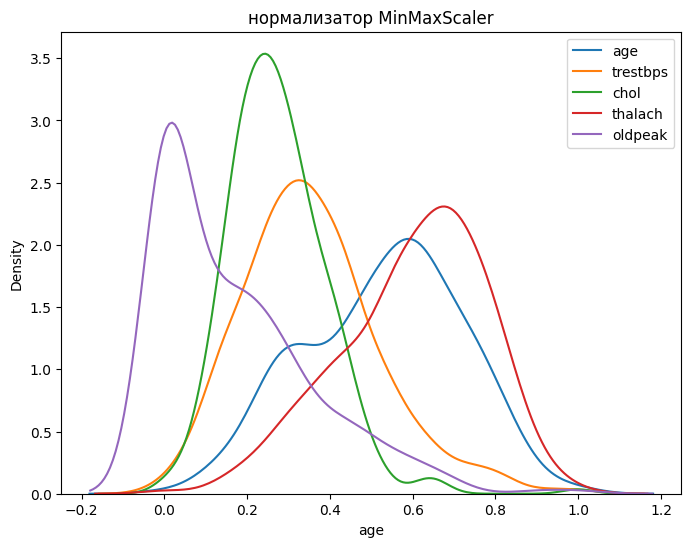

In [136]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('нормализатор MinMaxScaler')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart_mm['age'], ax=ax1, label ='age')
sns.kdeplot(heart_mm['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart_mm['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart_mm['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart_mm['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend();

In [137]:
display(heart_mm.describe())

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.354941,0.274575,0.600358,0.167678
std,0.189210,0.165454,0.118335,0.174849,0.187270
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.245283,0.194064,0.477099,0.000000
50%,0.541667,0.339623,0.260274,0.625954,0.129032
75%,0.666667,0.433962,0.339041,0.725191,0.258065
max,1.000000,1.000000,1.000000,1.000000,1.000000


Нормализуем методом RobustScaler

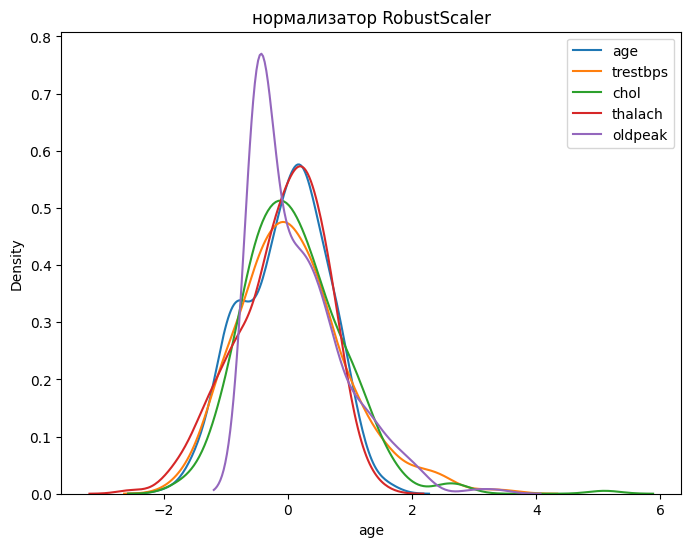

In [138]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
heart_r = r_scaler.fit_transform(heart[['age','trestbps', 'chol','thalach','oldpeak']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_r = pd.DataFrame(heart_r, columns=['age','trestbps', 'chol','thalach','oldpeak'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('нормализатор RobustScaler')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart_r['age'], ax=ax1, label ='age')
sns.kdeplot(heart_r['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart_r['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart_r['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart_r['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend();

In [139]:
display(heart_r.describe())

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752
std,0.672748,0.876907,0.816232,0.704774,0.725672
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000
max,1.629630,3.500000,5.102362,1.507692,3.375000


Стандартизируем

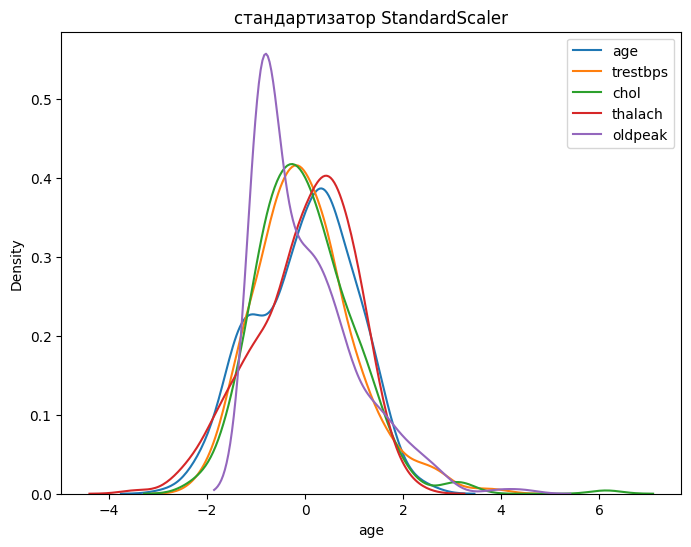

In [140]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
heart_s = s_scaler.fit_transform(heart[['age','trestbps', 'chol','thalach','oldpeak']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_s = pd.DataFrame(heart_s, columns=['age','trestbps', 'chol','thalach','oldpeak'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('стандартизатор StandardScaler')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart_s['age'], ax=ax1, label ='age')
sns.kdeplot(heart_s['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart_s['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart_s['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart_s['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend();

In [141]:
display(heart_s.describe())

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


Задание 8.7

Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<Axes: >

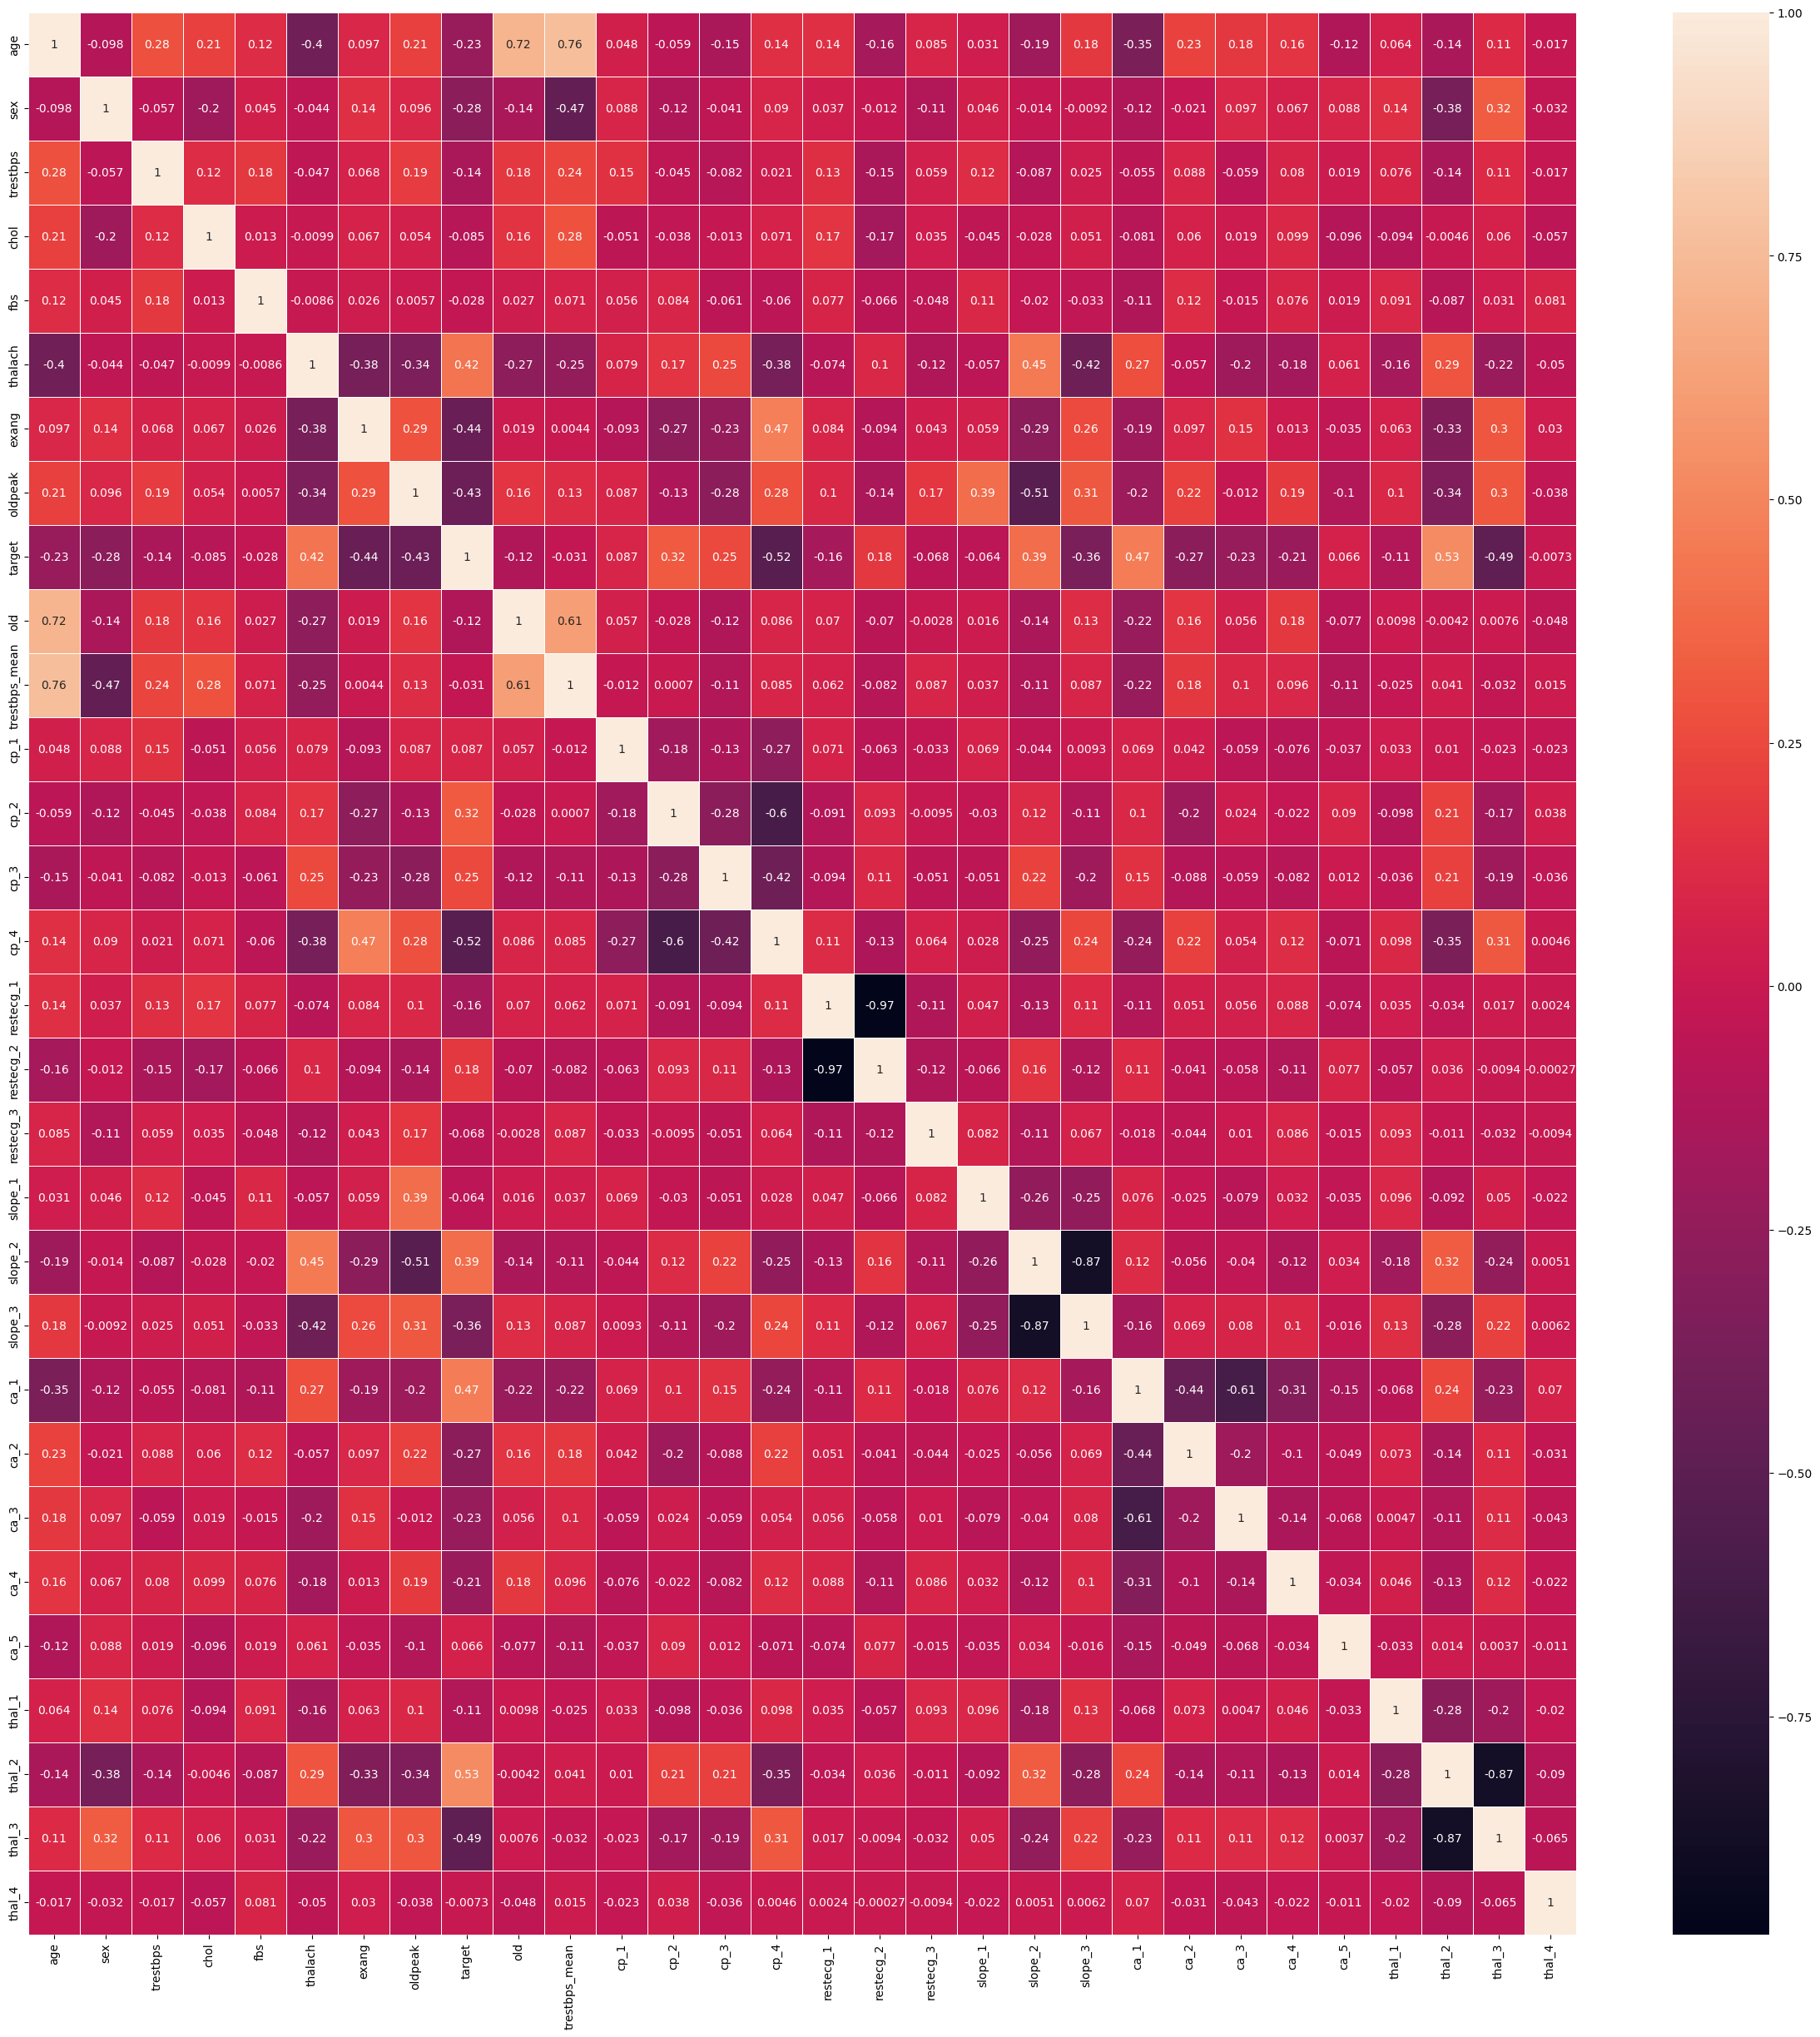

In [145]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(heart.corr(numeric_only=True), annot=True, linewidths=0.5)